### Introduction

Logistic regression is a widely used statistical and machine learning algorithm designed primarily for classification tasks. Like other predictive models, its main goal is to use explanatory variables to predict the behavior of an explained variable. Unlike linear regression, which predicts continuous outcomes, logistic regression is used for modeling binary variables. However, there are variations, such as multinomial logistic regression, that can model categorical data with more than two classes.

Because of its interpretability and effectiveness, logistic regression is applied across numerous domains, including healthcare (e.g., predicting the presence of a disease), economics (e.g., forecasting consumer behavior), insurance (e.g., assessing risk of claims).

## Model definition

Let Y be a binary random variable taking values in $\{0,1\}$ explained by p independent variables $\{X_1, ..., X_p\}$.  

We note X the random vector :

$$ X = \begin{pmatrix} 1 \\ X_1 \\ \vdots \\ X_n \end{pmatrix} $$
The logistic regression model assumes that the conditional distribution of $ Y | X = x $  follows a Bernoulli distribution with parameter  

$$
p(x) = \mathbb{P}(Y = 1 \mid X = x).
$$  

The model is based on the logit transformation:  

$$
\ln \left(\frac{p(x)}{1 - p(x)}\right) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p = x^T \beta,
$$  

where  

$$
x = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_p \end{pmatrix}, \quad 
\beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_p \end{pmatrix}
$$  

Equivalently, the probability can be written as:  

$$
p(x) = \frac{\exp( x^T  \beta)}{1 + \exp( x^T  \beta)}.
$$

Then, let's say we have a set of n observations, i.e we've got n realizations of our random vector $ (Y, X_1, ..., X_p) $ that we note $ (y_1, x_{1,1}, ..., x_{p,1}), ..., (y_n, x_{1,n}, ..., x_{p,n})$.

$ \forall i \in \{1, ..., n\}, \quad x_i = (1, x_{1,i}, ..., x_{p,i})$ is a realization of $ (1, X_1, ..., X_p) $ and $ y_i $ is a realization of $ Y | X = x_i \sim \mathcal{B}(p(x_i))$

Now the quantity that we want to maximize is the likelihood which is defined as follow :

$$\begin{align}
\mathcal{L}_n(\beta, x, y) &= \prod_{i=1}^{n} \mathbb{P}(Y = y_i \mid X = x_i) \\
                        &= \prod_{i=1}^{n} p(x_i)^{y_i} \, (1 - p(x_i))^{1 - y_i}
\end{align}$$

For simplicity it's usual to use the log-likelihood to simplify calculus :

$$\begin{align}
\ln(\mathcal{L}_n(\beta, x, y)) &= \sum_{i=1}^{n} y_i \ln(p(x_i)) + (1 - y_i) \ln(1-p(x_i)) \\
                            &= \sum_{i=1}^{n} y_i \ln(\frac{p(x_i)}{1-p(x_i)}) + \ln(1-p(x_i))\\
                            &= \sum_{i=1}^{n} y_i x_i^T \beta - \ln(1 + \exp(x_i^T \beta))
\end{align}$$

Now that we have defined the quantity to maximize, we need an algorithm to perform the optimization. For this purpose, we will use gradient descent. But before using it we need to calculate the gradient of $ \ln(\mathcal{L_n})$.

Our gradient is defined as follow :

$$ \nabla \ln(\mathcal{L_n}) = \begin{pmatrix} \frac{\partial \ln(\mathcal{L_n})}{\partial \beta_0} \\ \vdots \\ \frac{\partial \ln(\mathcal{L_n})}{\partial \beta_p} \end{pmatrix}  $$

where 

$$ \begin{align}
\forall j \in \{1, ..., p\} \quad \frac{\partial \ln(\mathcal{L_n})}{\partial \beta_j} &= \sum_{i=1}^{n} y_i x_{j,i} - \frac{x_{j,i}\exp(x_i^T \beta)}{1 + \exp(x_i^T \beta)}\\
                                                                                       &= \sum_{i=1}^{n} x_{j,i}(y_i - p(x_i))
\end{align}$$

With matrix, it becomes simply :

$$ \nabla \ln(\mathcal{L_n}) = \mathbf{X}^T (\mathbf{Y}-\mathbf{P})$$

where 
$$ \mathbf{X} = \begin{pmatrix}
1 & x_{1,1} & \dots & x_{p,1}\\
1 & x_{1,2} & \dots & x_{p,2}\\
\vdots & \vdots & \vdots & \vdots\\
1 & x_{1,n} & \dots & x_{p,n}
\end{pmatrix}, \quad \mathbf{Y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix} \quad \mathbf{P} = \begin{pmatrix} p(x_1) \\ p(x_2) \\ \vdots \\ p(x_n) \end{pmatrix}   $$

Finally, as a reminder, gradient descent follows this simple iterative update rule: 

$$ \beta_{n+1} = \beta_n - \alpha \nabla \ln(\mathcal{L_n}(\beta_n))$$

Now that we have everything we need, let's implement it inside a python class that we will call Logisticregression.
We first define the \__init__ function that is called when the class is called and that initialize our parameters : **learning_rate**, **epochs** and our **threshold**.

```python 
def __init__(self, learning_rate=0.01, epochs=100, threshold=0.5):
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.threshold = threshold
```

We go on to implement our product $ x^T \beta $, actually it's our generalized product that return the matrix product of $ \mathbf{X} \times \beta $

```python 
def X_B(self, X):
    return self.beta[0] + np.dot(X, self.beta[1:])
```

Then we define our propability p(x) that depends of our input and our $\beta$
```python 
def P(self, z):
    return 1./(1.+np.exp(-z))
```
After that we define our function predict that calculate our vector $\mathbf{P}$ and return a vector of same size with value one if $ p(x_i) \geq \text{threshold}$ and 0 otherwise
```python 
def predict(self, X):
        proba = self.P(self.X_B(X))
        return np.where(proba >= self.threshold, 1, 0)
```

Then we implement our cost function that calculate our log-likelihood

```python 
def cost(self, y, proba):
    return np.dot(y,np.log(proba)) + np.dot((1-y),np.log(1-proba))
```

Next, we define a generator that apply gradient descent to our X and y datas. It updates our $ \beta $ and returns the cost at each step.
We add a security with our second line proba that pose $ 10^{-9} $ as our minimum value for our probabilities, thus avoiding numerical issues when implementing $ \ln(p(x))$.

```python 
def gradient_decent(self, X, y):
    for i in range(self.epochs):
        proba = self.P(self.X_B(X))
        proba = np.where(proba < 1e-9, 1e-9, proba)
        errors = y - proba
        self.beta[1:] += self.learning_rate * X.T.dot(errors)
        self.beta[0] += self.learning_rate * errors.sum()
        yield self.cost(y, proba)
```
Finally we create our fit function that apply our gradient-descent generator after initializing our $ \beta $, it return the cost for our gradient descent at each epochs in a list.

```python 
def fit(self, X, y):
    self.beta = np.random.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.costs = []

    for cost in self.gradient_decent(X, y):
        self.costs.append(cost)
    return self
```


All that’s left for this notebook is to apply our class to an example. For this test, we chose a dataset of digit images and selected only the pictures corresponding to 0 and 1 (to match our binary classification case).

### Importing Libraries and our Logisticregression class

In [1]:
#import dataset needed packages
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np

#import our class
from my_classes.logisticregression_class import Logisticregression

### Preparing data

In [2]:
data = load_digits()

X = data['data']
y = data['target']

index = np.isin(y, [0, 1])

X = X[index]
y = y[index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Loading and fitting the model

In [3]:
model = Logisticregression(learning_rate=0.001, epochs=100, threshold=0.5)
model = model.fit(X_train, y_train)


### Scoring our trained Logistic regression

In [4]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred,target_names=["digit 0", "digit 1"]))

              precision    recall  f1-score   support

     digit 0       1.00      1.00      1.00        35
     digit 1       1.00      1.00      1.00        37

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



### Visualizing our weights getting updated

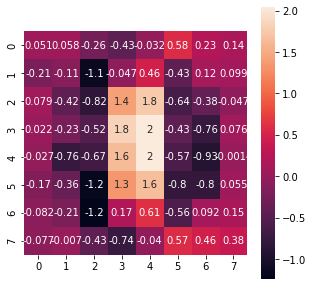

In [8]:
from IPython.display import clear_output 
import matplotlib.pyplot as plt 
import seaborn as sns # prepare the data 

list_mat = [mat[1:].reshape(8,8) for mat in model.hist] 
image_array = [] 

for mat in list_mat: 
    clear_output(wait=True) # clear previous plot 
    plt.figure(figsize=(5,5)) 
    sns.heatmap(mat, cbar=True,annot=True, square=True) 
    plt.show() 
    plt.pause(0.25)

We see that after just 4 epochs our weights are roughly stable.

### Plotting our log-likelihood over the epochs (cost function)

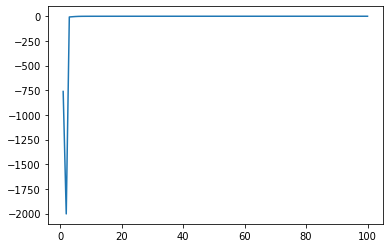

In [ ]:
import matplotlib.pyplot as plt

y = model.costs
x = [i+1 for i in range(len(y))]

plt.plot(x,y)
#plt.xlim(x[0], x[-1])
#plt.ylim(min(y), 10 + max(y))
plt.show()
